In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("data.csv", sep='\s*,\s*', engine='python')
sns.set_style("ticks")
# data.head()

In [30]:
sTimeSerial = data[(data['ranks'] == 1) & (data['scaling'] == 's')]['time'].mean()
data['sSpeedup'] = sTimeSerial / data['time']
wTimeSerial = data[(data['ranks'] == 1) & (data['scaling'] == 'w')]['time'].mean()
data['wSpeedup'] = wTimeSerial / data['time']
# data['dim'] = ["$%s$" % x for x in data['nx']]
# data['work-per-core'] = np.log(data['nx'] * data['nx'] / data['cores'] / 128 / 128 +1)
data['sEff'] = data['sSpeedup'] / data['ranks']
data['wEff'] = data['wSpeedup']
data.head(25)

scaling  nodes  ranks      n     k       time  resultNorm   sSpeedup  \
0        s      1      1   4800  1000  25.743305      4800.0   1.000000   
1        w      1      1  14400   100  23.153528     14400.0   1.111852   
2        s      1      4   4800  1000   6.524728      4800.0   3.945499   
3        w      1      4  28800   100  22.257466     28800.0   1.156614   
4        s      1      8   4800  1000   3.253786      4800.0   7.911800   
5        w      1      8  40728   100  22.827516     40728.0   1.127731   
6        s      1     12   4800  1000   2.151292      4800.0  11.966439   
7        w      1     12  49872   100  22.261217     49872.0   1.156419   
8        s      1     16   4800  1000   1.664864      4800.0  15.462707   
9        w      1     16  57600   100  22.225022     57600.0   1.158303   
10       s      2      4   4800  1000   6.616658      4800.0   3.890681   
11       w      2      4  28800   100  23.035311     28800.0   1.117558   
12       s      2      8   4800  1000   3.252630      4800.0   7.914612   
13       w      2      8  40728   100  22.783529     40728.0   1.129909   
14       s      2     12   4800  1000   2.217744      4800.0  11.607879   
15       w      2     12  49872   100  22.588850     49872.0   1.139647   
16       s      2     16   4800  1000   1.694675      4800.0  15.190703   
17       w      2     16  57600   100  22.370020     57600.0   1.150795   
18       s      2     32   4800  1000   0.965605      4800.0  26.660286   
19       w      2     32  81440   100  22.390193     81440.0   1.149758   
20       s      3     12   4800  1000   2.322668      4800.0  11.083506   
21       w      3     12  49872   100  22.957877     49872.0   1.121328   
22       s      4      4   4800  1000   6.600631      4800.0   3.900128   
23       w      4      4  28800   100  23.209222     28800.0   1.109184   
24       s      4      8   4800  1000   3.473023      4800.0   7.412362   

     wSpeedup      sEff       wEff  
0    0.899400  1.000000   0.899400  
1    1.000000  1.111852   1.000000  
2    3.548581  0.986375   3.548581  
3    1.040259  0.289154   1.040259  
4    7.115873  0.988975   7.115873  
5    1.014282  0.140966   1.014282  
6   10.762615  0.997203  10.762615  
7    1.040084  0.096368   1.040084  
8   13.907159  0.966419  13.907159  
9    1.041778  0.072394   1.041778  
10   3.499278  0.972670   3.499278  
11   1.005132  0.279390   1.005132  
12   7.118402  0.989327   7.118402  
13   1.016240  0.141239   1.016240  
14  10.440127  0.967323  10.440127  
15   1.024998  0.094971   1.024998  
16  13.662518  0.949419  13.662518  
17   1.035025  0.071925   1.035025  
18  23.978260  0.833134  23.978260  
19   1.034092  0.035930   1.034092  
20   9.968505  0.923626   9.968505  
21   1.008522  0.093444   1.008522  
22   3.507775  0.975032   3.507775  
23   0.997600  0.277296   0.997600  
24   6.666679  0.926545   6.666679

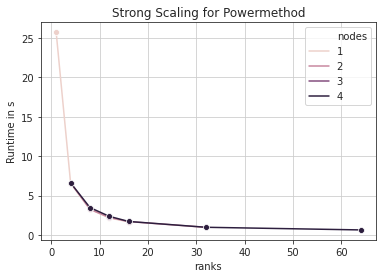

In [31]:
# Strong Scaling
dat=data[data['scaling'] == 's']

# Create main plot
ax1 = sns.lineplot(data=dat, x='ranks', y='time', hue='nodes', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Runtime in s', xlabel='ranks', 
        title='Strong Scaling for Powermethod')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("strong.pdf", bbox_inches='tight')

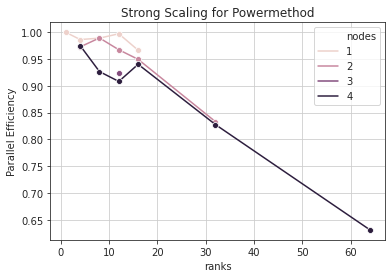

In [32]:
# Parallel Efficiency
plt.clf()
ax1 = sns.lineplot(data=dat, x='ranks', y='sEff', hue='nodes', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Parallel Efficiency', xlabel='ranks', 
        title='Strong Scaling for Powermethod')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("strong-eff.pdf", bbox_inches='tight')

# Weak Scaling

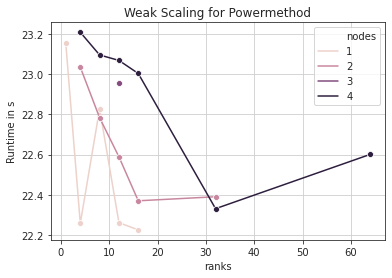

In [33]:
# Strong Scaling
dat=data[data['scaling'] == 'w']

# Create main plot
ax1 = sns.lineplot(data=dat, x='ranks', y='time', hue='nodes', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Runtime in s', xlabel='ranks', 
        title='Weak Scaling for Powermethod')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("weak.pdf", bbox_inches='tight')

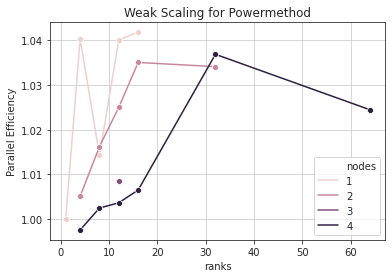

In [34]:
# Parallel Efficiency
plt.clf()
ax1 = sns.lineplot(data=dat, x='ranks', y='wEff', hue='nodes', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Parallel Efficiency', xlabel='ranks', 
        title='Weak Scaling for Powermethod')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("weak-eff.pdf", bbox_inches='tight')